# Improving Decision Trees
We will be learning about random forests in this module, which as you may guess from the name, is a model built with multiple trees. The goal of random forests is to take the advantages of decision trees while mitigating the variance issues.

# Bootstrapping
A bootstrapped sample is a random sample of datapoints where we randomly select with replacement datapoints from our original dataset to create a dataset of the same size. Randomly selecting with replacement means that we can choose the same datapoint multiple times. This means that in a bootstrapped sample, some datapoints from the original dataset will appear multiple times and some will not appear at all.

For example if we have four datapoints A, B, C, D, these could be 3 resamples:

A, A, B, C
B, B, B, D
A, A, C, C

We would rather be able to get more samples of data from the population, but as all we have is our training set, we use that to generate additional datasets.

We use bootstrapping to mimic creating multiple samples.

# Bagging Decision Trees
Bootstrap Aggregation (or Bagging) is a technique for reducing the variance in an individual model by creating an ensemble from multiple models built on bootstrapped samples.

To bag decision trees, we create multiple (say 10) bootstrapped resamples of our training dataset. So if we have 100 datapoints in our training set, each of the resamples will have 100 datapoints randomly chosen from our training set. Recall that we randomly select with replacement, meaning that some datapoints will appear multiple times and some not at all.

We create a decision tree with each of these 10 resamples.

To make a prediction, we make a prediction with each of the 10 decision trees and then each decision tree gets a vote. The prediction with the most votes is the final prediction.

When we bootstrap the training set, we're trying to wash out the variance of the decision tree. The average of several trees that have different training sets will create a model that more accurately gets at the essence of the data.

# Decorrelate the trees
With bagged decision trees, the trees may still be too similar to have fully created the ideal model. They are built on different resamples, but they all have access to the same features. Thus we will add some restrictions to the model when building each decision tree so the trees have more variation. We call this decorrelating the trees.

If you recall, when building a decision tree, at every node, we compare all the split thresholds for each feature to find the single best feature & split threshold. In a decision tree for a random forest, at each node, we randomly select a subset of the features to consider. This will result in us choosing a good, but not the best, feature to split on at each step. It’s important to note that the random selection of features happens at each node. So maybe at the first node we consider the Sex and Fare features and then at the second node, the Fare and Age features.

A standard choice for the number of features to consider at each split is the square root of the number of features. So if we have 9 features, we will consider 3 of them at each node (randomly chosen).

If we bag these decision trees, we get a random forest.

Each decision tree within a random forest is probably worse than a standard decision tree. But when we average them we get a very strong model!

# Review of breast cancer dataset
We’ll be using the breast cancer dataset in this lesson. Recall that the dataset has measures of different attributes of a lump in breast tissue and a label of whether or not the tumor is cancerous.

The dataset has 569 datapoints and 30 features.

In [ ]:
 import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values
print('data dimensions', X.shape)

data dimensions (569, 30)


# Random Forest with Sklearn
The syntax for building and using a **Random Forest** model is the same as it was for Logistic Regression and Decision Trees. The builders of scikit-learn intentionally made it so that it would be easy to switch between and compare different models.

Here’s the import statement for importing the Random Forest model for classification.


```
from sklearn.ensemble import RandomForestClassifier
```
We’ll first split the dataset into a training set and test set.


```
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
```
We have added the **random state** parameter here so that it will do the same split every time we run the code. Without the random state, we’d expect different datapoints in the training and testing sets each time we run the code which can make it harder to test the code.

Then we create the **RandomForestClassifier** object and use the fit method to build the model on the training set.


```
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
```
Now we can use the model to make a prediction. For example, let’s take the first row of the test set and see what the prediction is. Recall that the **predict** method takes an array of points, so even when we have just one point, we have to put it in a list.






In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

first_row = X_test[0]
print("prediction:", rf.predict([first_row]))
print("true value:", y_test[0])

prediction: [1]
true value: 1


These results mean that the model predicted that the lump was cancerous and that was correct.

We can use the **score** method to calculate the accuracy over the whole test set.

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
first_row = X_test[0]

print("random forest accuracy:", rf.score(X_test, y_test))


random forest accuracy: 0.972027972027972


Thus the accuracy is 96.5%. We can see how this compares to the Decision Tree model.

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("decision tree accuracy:", dt.score(X_test, y_test))

decision tree accuracy: 0.9090909090909091


So the **accuracy** for the decision tree model is 90.2%, much worse than that for the random forest.

# Random Forest Parameters
When you look at the scikit-learn docs for the **RandomForestClassifier**, you will see quite a few parameters that you can control. We will be looking at a few of them, but you can learn about all of them in the docs. 

Since a random forest is made up of decision trees, we have all the same tuning parameters for prepruning as we did for decision trees: **max_depth**, **min_samples_leaf**, and **max_leaf_nodes**. With random forests, it is generally not important to tune these as overfitting is generally not an issue.

We will look at two new tuning parameters: n_estimators (the number of trees) and max_features (the number of features to consider at each split).

The default for the max features is the square root of p, where p is the number of features (or predictors). The default is generally a good choice for max features and we usually will not need to change it, but you can set it to a fixed number with the following code.


```
rf = RandomForestClassifier(max_features=5)
```

The default number of estimators (decision trees) is 10. This often works well but may in some cases be too small. You can set it to another number as follows. We will see in the next parts how to choose the best value.


```
rf = RandomForestClassifier(n_estimators=15)
```

One of the big advantages of Random Forests is that they rarely require much tuning. The default values will work well on most datasets.

# Grid Search
If you recall from the Decision Tree module, scikit-learn has built in a Grid Search class to help us find the optimal choice of parameters.

Let’s use Grid Search to compare the performance of a random forest with different numbers of trees.

Recall that we need to define the parameter grid of the parameters we want to vary and give a list of the values to try.


```
 param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
}
```

Now we can create a Random Forest Classifier and a Grid Search. Recall that the Grid Search will do k-fold cross validation for us. We set cv=5 for 5-fold cross validation.


```
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
```
Now we use the **fit method** to run the grid search. The best parameters will be stored in the best_params_ attribute.







In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

param_grid = {
	'n_estimators': [10, 25, 50, 75, 100],
}

rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 100}


These are the parameters which yield the highest accuracy as that is the default metric. Note that you may get slightly different results each time you run this as the random split in the 5 folds may affect which has the best accuracy score.

Accuracy will work okay for us in this case as the classes in the breast cancer dataset are reasonably balanced. If the classes are imbalanced, we would want to use an alternative metric, like the f1-score. We can change the metric by scoring parameter to "f1" as follows. To avoid outputting a different best parameter each time, one can set the random_state in the classifier.

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

param_grid = {
	'n_estimators': [10, 25, 50, 75, 100],
}

rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 25}


# Elbow Graph
With a parameter like the number of trees in a random forest, increasing the number of trees will never hurt performance. Increasing the number trees will increase performance until a point where it levels out. The more trees, however, the more complicated the algorithm. A more complicated algorithm is more resource intensive to use. Generally it is worth adding complexity to the model if it improves performance but we do not want to unnecessarily add complexity.

We can use what is called an **Elbow Graph** to find the sweet spot. Elbow Graph is a model that optimizes performance without adding unnecessary complexity.

To find the optimal value, let’s do a Grid Search trying all the values from 1 to 100 for n_estimators.


```
n_estimators = list(range(1, 101))
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
```
Instead of just looking at the best params like we did before, we are going to use the entire result from the grid search. The values are located in the cv_results_ attribute. This is a dictionary with a lot of data, however, we will only need one of the keys: mean_test_score. Let’s pull out these values and store them as a variable.


```
scores = gs.cv_results_['mean_test_score']
# [0.91564148, 0.90685413, ...]
```


Now let’s use matplotlib to graph the results.


```
import matplotlib.pyplot as plt

scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()
```
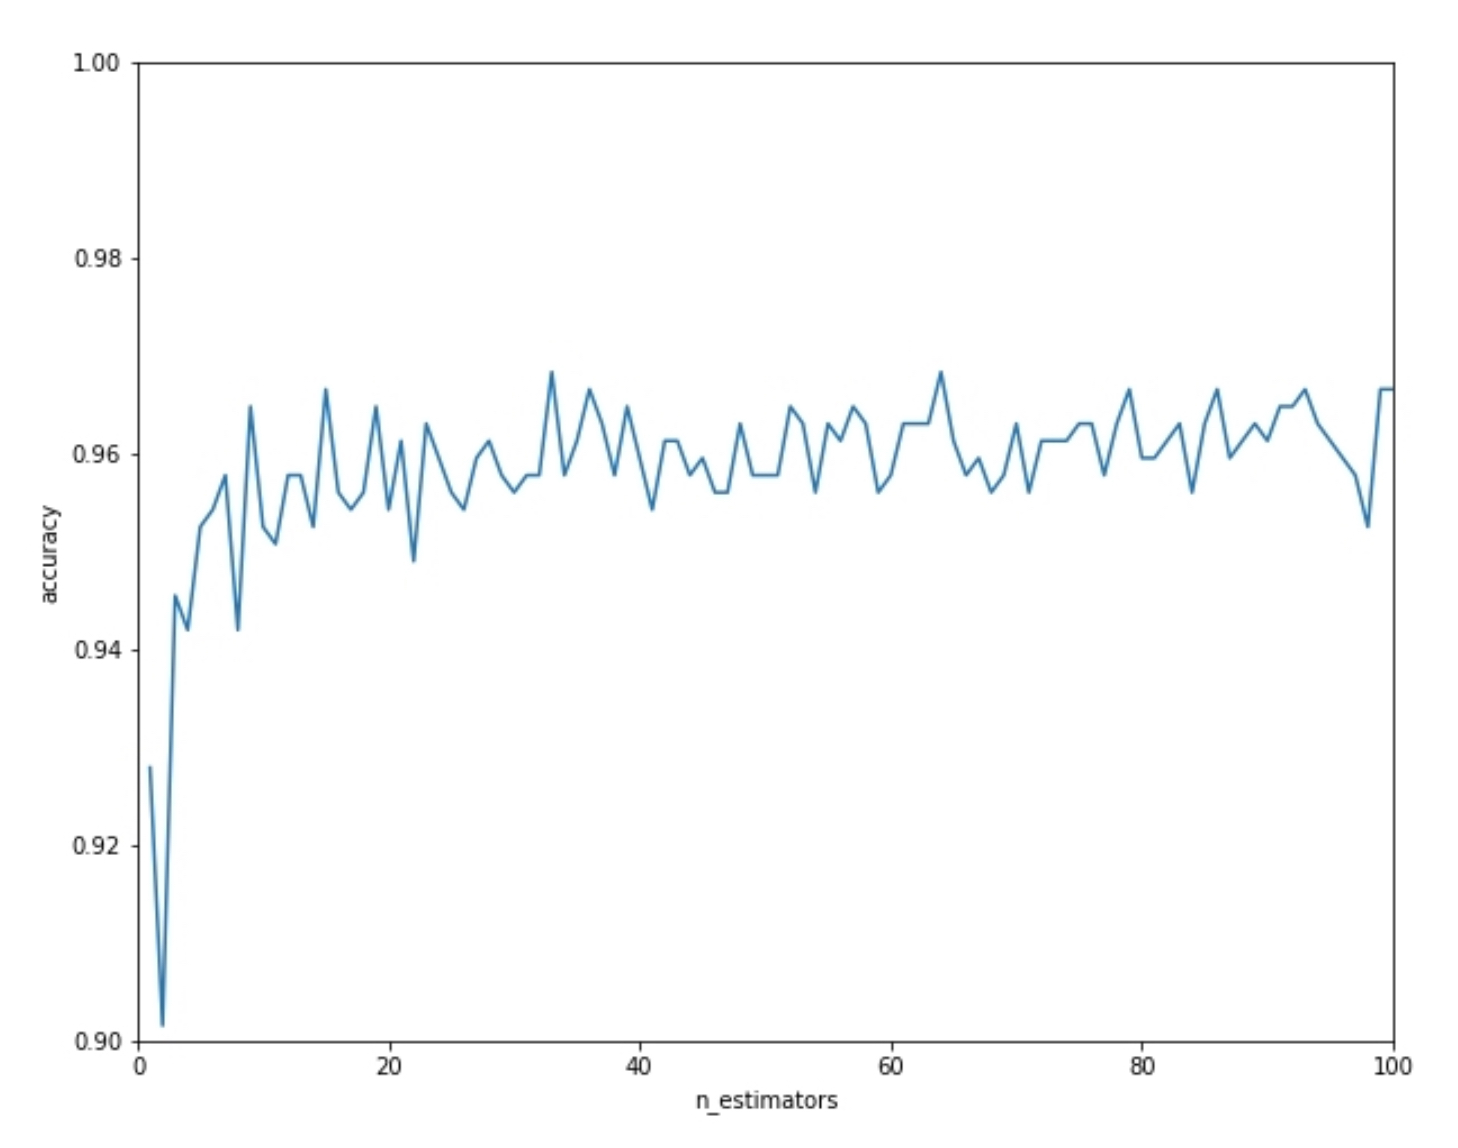

IfIf we look at this graph, we see that around 10 trees the graph levels out. The best model occurred at n_estimators=33 and n_estimators=64, but given how volatile it is, that was probably due to random chance. We should choose about 10 to be our number of estimators, because we want the minimum number of estimators that still yield maximum performance. we look at this graph, we see that around 10 trees the graph levels out. The best model occurred at n_estimators=33 and n_estimators=64, but given how volatile it is, that was probably due to random chance. We should choose about 10 to be our number of estimators, because we want the minimum number of estimators that still yield maximum performance.If we look at this graph, we see that around 10 trees the graph levels out. The best model occurred at n_estimators=33 and n_estimators=64, but given how volatile it is, that was probably due to random chance. We should choose about 10 to be our number of estimators, because we want the minimum number of estimators that still yield maximum performance.
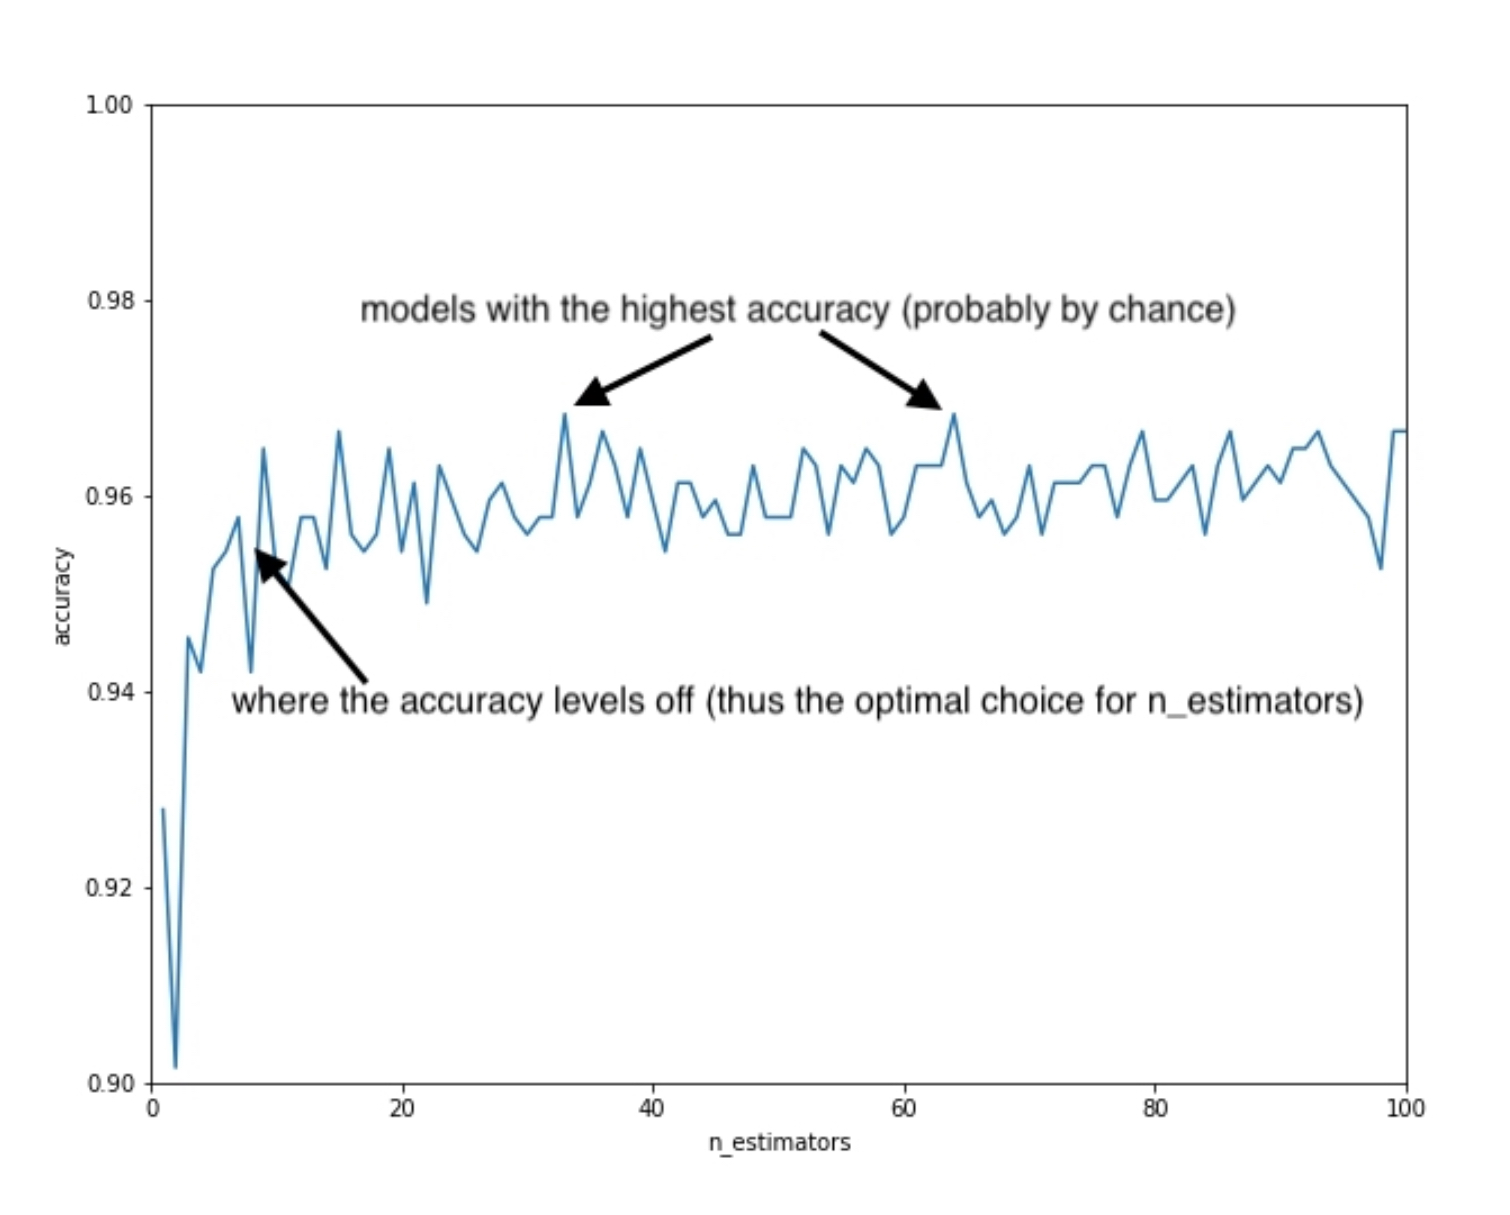


Now we can build our random forest model with the optimal number of trees.


```
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y) 
```
You’ll see elbow graphs pop up in lots of different situations when we are adding complexity to a model and want to determine the minimal amount of complexity that will yield optimal performance.


# Feature Importances
There are 30 features in the cancer dataset. Does every feature contribute equally to building a model? If not, which subset of features should we use? This is a matter of **feature selection**. 

Random forests provide a straightforward method for feature selection: mean decrease impurity. Recall that a random forest consists of many decision trees, and that for each tree, the node is chosen to split the dataset based on maximum decrease in impurity, typically either Gini impurity or entropy in classification. Thus for a tree, it can be computed how much impurity each feature decreases in a tree. And then for a forest, the impurity decrease from each feature can be averaged. Consider this measure a metric of importance of each feature, we then can rank and select the features according to feature importance.

Scikit-learn provides a feature_importances_ variable with the model, which shows the relative importance of each feature. The scores are scaled down so that the sum of all scores is 1.
Let's find the feature importances in a random forest with n_estimator = 10 using the training dataset, and display them in the descending order.


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = \
	train_test_split(X, y, random_state=101)
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)

ft_imp = pd.Series(rf.feature_importances_, index=cancer_data.feature_names).sort_values(ascending=False)
print(ft_imp.head(10))
 

worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
dtype: float64


From the output, we can see that among all features, **worst radius** is most important (0.31), followed by **mean concave points** and **worst concave points**.

# New Model on Selected Features
Why should we perform feature selection? Top reasons are: it enables us to train a model faster; it reduces the complexity of a model thus makes it easier to interpret. And if the right subset is chosen, it can improve the accuracy of a model. Choosing the right subset often relies on domain knowledge, some art, and a bit of luck.

In our dataset, we happen to notice that features with "worst" seem to have higher importances. As a result we are going to build a new model with the selected features and see if it improves accuracy. Recall the model from the last part.

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))




0.965034965034965


We first find the features whose names include the word "worst":

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

worst_cols = [col for col in df.columns if 'worst' in col]
print(worst_cols)

['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


There are ten such features. Now we create another dataframe with the selected features, followed by a train test split with the same random state.


```
X_worst = df[worst_cols]
X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state=101)
```



In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

rf = RandomForestClassifier(n_estimators=10, random_state=111)

worst_cols = [col for col in df.columns if 'worst' in col]
X_worst = df[worst_cols]
X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state=101)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.972027972027972


Here we are able to improve the accuracy using a subset of features, a third of the total features to be exact. This is because we removed some noise and highly correlated features, resulting in an increased accuracy. The advantage of building a better model using less features will be more pronounced when the sample size is large.

There is no best feature selection method, at least not universally. Instead, we must discover what works best for the specific problem and leverage the domain expertise to build a good model. 
Scikit-learn provides an easy way to discover the feature importances.

# Performance
Probably the biggest advantage of Random Forests is that they generally perform well without any tuning. They will also perform decently well on almost every dataset.

A linear model, for example, cannot perform well on a dataset that cannot be split with a line. It is not possible to split the following dataset with a line without manipulating the features. However, a random forest will perform just fine on this dataset.
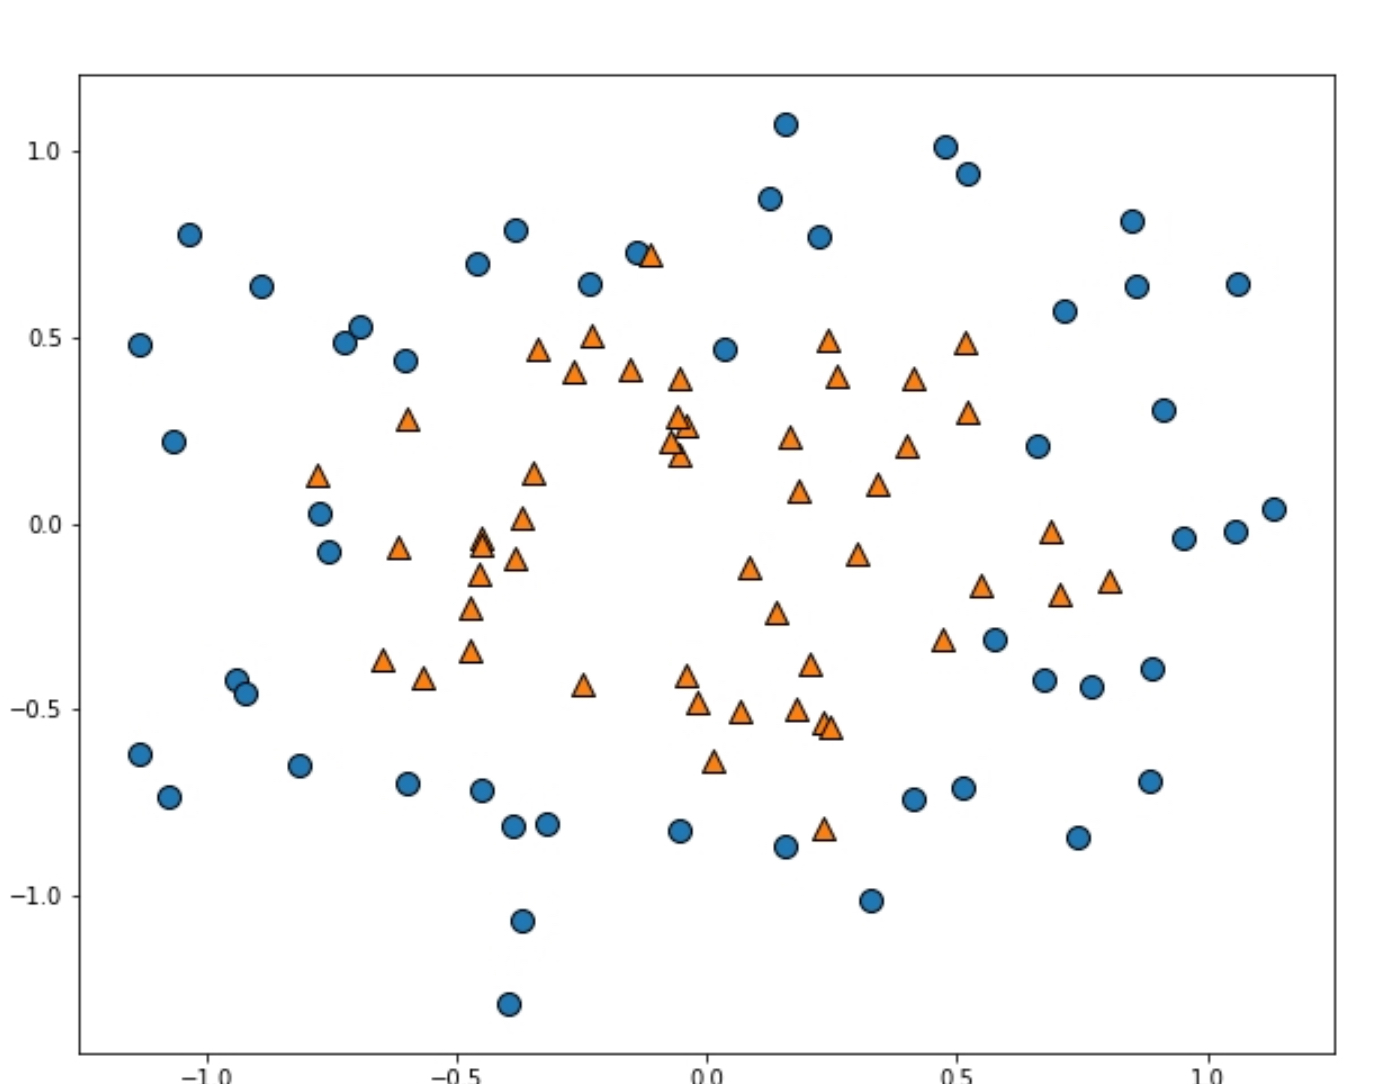
We can see this by looking at the code to generate the fake dataset above and comparing a Logistic Regression model with a Random Forest model. The function make_circles makes a classification dataset with concentric circles. We use kfold cross validation to compare the accuracy scores and see that the Logistic Regression model performs worse than random guessing but the Random Forest model performs quite well.


In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

kf = KFold(n_splits=5, shuffle=True, random_state=1)
lr_scores = []
rf_scores = []
for train_index, test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	lr = LogisticRegression(solver='lbfgs')
	lr.fit(X_train, y_train)
	lr_scores.append(lr.score(X_test, y_test))
	rf = RandomForestClassifier(n_estimators=100)
	rf.fit(X_train, y_train)
	rf_scores.append(rf.score(X_test, y_test))
print("LR accuracy:", np.mean(lr_scores))
print("RF accuracy:", np.mean(rf_scores))

LR accuracy: 0.36
RF accuracy: 0.82
